<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.7/546.7 kB 6.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/tradevesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2024-10-25 19:41:46
-------------------
qualified stocks: 86
with latest results: 82
still star stocks: 40
-------------------
Initial Investment:  95.62 L
CY Investment:  1.09 C
Reserve:  400.00
Current:  1.13 C
-------------------
Today PnL: -2.34 L (-2.02%)
Current PnL: -3.93 L (-3.61%)
CY Booked + Current PnL: 4.46 L (4.1%)
-------------------
Total profit:  7.51 L
Total loss:  -11.44 L
-------------------
Total Booked + Current PnL: 17.57 L (18.38%)
Total Booked PnL: 21.50 L (22.48%)
Curr Year Booked PnL: 8.39 L (7.39%)
Prev Year Booked PnL: 13.11 L (13.71%)
Est FTT:  1.86 C
Est FTT PnL: 72.39 L (63.79%)
-------------------
Est LTT:  2.34 C
Est LTT PnL: 1.20 C (105.95%)
Deployed:  95.62 L
Current:  1.13 C
CAGR/XIRR %: 16.77%


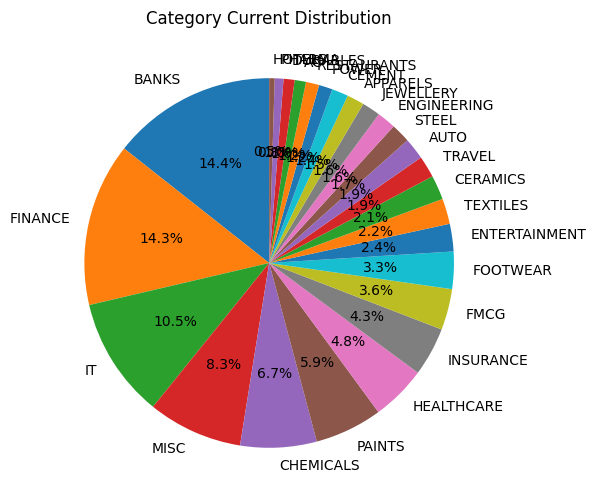

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2()
cols = ['Symbol', 'AvgCost', 'Close', 'FTT', 'Dev%_PE', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
31,HCLTECH,1349.00,1852.35,2006.00,47.33,98.84,138926.0,37751.0,11517.0,0.40,37.31,8.29,48.70,118.0,3.28,1.22,55.76,X40,BTT,IT
47,LALPATHLAB,2519.90,3137.65,3689.00,-2.94,72.09,112955.0,22239.0,19846.0,2.90,24.51,17.57,46.39,45.0,1.12,1.00,56.64,X40N,NTT,HEALTHCARE
49,LTIM,5051.49,5903.20,7262.39,19.61,82.56,94451.0,13627.0,21743.0,-0.79,16.86,23.02,43.77,15.0,0.63,0.83,30.09,X200,ATH,IT
55,PIDILITIND,2482.94,3178.95,3576.00,-2.31,87.21,184379.0,40368.0,23029.0,1.84,28.03,12.49,44.02,21.0,1.75,1.62,39.19,X40,BTT,CHEMICALS
85,WIPRO,401.00,543.45,611.00,27.96,95.35,228792.0,59971.0,28439.0,-0.63,35.52,12.43,52.37,30.0,2.11,2.02,43.98,XR,NTT,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,CAMPUS,294.86,284.55,631.85,9.35,6.98,161909.0,-5866.0,197610.0,-0.61,-3.50,122.05,114.29,7.0,-0.03,1.43,32.66,XSP,ATH,FOOTWEAR
62,SAIL,130.64,111.48,228.00,43.77,17.44,191969.0,-32993.0,200646.0,-4.82,-14.67,104.52,74.53,141.0,-0.16,1.69,36.58,XSP,BTT,STEEL
11,BANDHANBNK,223.20,168.21,400.00,-41.28,13.95,164341.0,-53725.0,226462.0,-6.89,-24.64,137.80,79.21,-17.0,-0.24,1.45,0.00,XSP,NTT,BANKS
74,TANLA,991.56,729.10,2007.31,-39.09,10.47,161131.0,-58004.0,282479.0,-3.27,-26.47,175.31,102.44,-21.0,-0.21,1.42,0.00,AR,ATH,IT


In [5]:
# lower current allocation with minimal upside
tmp_df = df_portfolio_features[(df_portfolio_features['CurrAlloc%'] < 1) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
49,LTIM,5051.49,5903.20,7262.39,19.61,82.56,94451.0,13627.0,21743.0,-0.79,16.86,23.02,43.77,15.0,0.63,0.83,30.09,X200,ATH,IT
15,BAYERCROP,4346.57,6323.05,8325.00,22.03,94.19,101169.0,31624.0,32030.0,-0.50,45.47,31.66,91.53,37.0,0.99,0.89,33.42,X40N,BTT,CHEMICALS
22,DABUR,523.35,538.70,735.00,-8.40,30.23,94273.0,2687.0,34353.0,-0.42,2.93,36.44,40.44,9.0,0.08,0.83,9.25,X40,BTT,FMCG
79,TTKPRESTIG,769.29,835.35,1149.24,20.80,79.65,109431.0,8654.0,41124.0,-0.94,8.59,37.58,49.39,21.0,0.21,0.96,25.69,X40N,ATH,DURABLES
7,ATULAUTO,656.09,576.50,844.00,NaN,52.33,91087.0,-12575.0,42264.0,-4.51,-12.13,46.40,28.64,-38.0,-0.30,0.80,21.19,XSP,NTT,AUTO
37,INDUSINDBK,1354.50,1041.60,1800.00,-41.29,2.33,59371.0,-17836.0,43228.0,-18.63,-23.10,72.81,32.89,-3.0,-0.41,0.52,0.00,XR,NTT,BANKS
25,FINEORG,4771.46,4624.65,7168.71,-7.95,37.21,78619.0,-2496.0,43248.0,-2.38,-3.08,55.01,50.24,3.0,-0.06,0.69,14.83,X40N,ATH,CHEMICALS
81,UNIONBANK,124.65,108.24,163.00,-16.54,24.42,87025.0,-13194.0,44026.0,-1.84,-13.16,50.59,30.77,-70.0,-0.30,0.77,17.26,XSP,NTT,BANKS
17,BSOFT,628.85,571.15,848.50,2.99,66.28,99951.0,-10098.0,48536.0,0.37,-9.18,48.56,34.93,-22.0,-0.21,0.88,9.36,XR,ATH,IT
75,TATAELXSI,7332.28,6990.65,10499.44,-6.14,50.00,97869.0,-4783.0,49120.0,0.35,-4.66,50.19,43.19,1.0,-0.10,0.86,4.94,X40N,ATH,IT


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XSP') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
41,JIOFIN,320.24,311.20,387.00,-10.48,39.53,153733.0,-4466.0,37449.0,-1.55,-2.82,24.36,20.85,104.0,-0.12,1.35,45.32,XSP,BTT,FINANCE
7,ATULAUTO,656.09,576.50,844.00,NaN,52.33,91087.0,-12575.0,42264.0,-4.51,-12.13,46.40,28.64,-38.0,-0.30,0.80,21.19,XSP,NTT,AUTO
81,UNIONBANK,124.65,108.24,163.00,-16.54,24.42,87025.0,-13194.0,44026.0,-1.84,-13.16,50.59,30.77,-70.0,-0.30,0.77,17.26,XSP,NTT,BANKS
16,BERGEPAINT,558.54,536.95,680.00,-29.18,33.72,170213.0,-6844.0,45345.0,-1.30,-3.87,26.64,21.75,-2.0,-0.15,1.50,18.58,XSP,NTT,PAINTS
68,SHALBY,271.92,238.00,327.00,NaN,29.07,131614.0,-18758.0,49210.0,-4.13,-12.47,37.39,20.26,-17.0,-0.38,1.16,10.73,XSP,NTT,HEALTHCARE
56,QUESS,716.17,687.80,986.00,-17.63,20.93,120365.0,-4965.0,52190.0,-3.45,-3.96,43.36,37.68,14.0,-0.10,1.06,69.79,XSP,NTT,MISC
71,STARHEALTH,596.56,539.95,761.00,-20.86,46.51,144707.0,-15171.0,59243.0,-1.05,-9.49,40.94,27.56,-9.0,-0.26,1.28,8.15,XSP,NTT,INSURANCE
43,JPPOWER,18.73,17.89,26.20,-63.62,96.51,135481.0,-6361.0,62931.0,-2.72,-4.48,46.45,39.88,164.0,-0.10,1.19,101.01,XSP,NTT,POWER
52,MEDANTA,1022.60,1060.15,1486.00,-5.90,91.86,161143.0,5708.0,64731.0,-0.54,3.67,40.17,45.32,89.0,0.09,1.42,41.87,XSP,NTT,HEALTHCARE
77,TITAGARH,1117.46,1146.40,1548.00,10.92,53.49,186863.0,4717.0,65458.0,-1.71,2.59,35.03,38.53,NaN,0.07,1.65,54.75,XSP,NTT,ENGINEERING


In [7]:
# XSP for average up
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XSP') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
41,JIOFIN,320.24,311.20,387.00,-10.48,39.53,153733.0,-4466.0,37449.0,-1.55,-2.82,24.36,20.85,104.0,-0.12,1.35,45.32,XSP,BTT,FINANCE
7,ATULAUTO,656.09,576.50,844.00,NaN,52.33,91087.0,-12575.0,42264.0,-4.51,-12.13,46.40,28.64,-38.0,-0.30,0.80,21.19,XSP,NTT,AUTO
81,UNIONBANK,124.65,108.24,163.00,-16.54,24.42,87025.0,-13194.0,44026.0,-1.84,-13.16,50.59,30.77,-70.0,-0.30,0.77,17.26,XSP,NTT,BANKS
16,BERGEPAINT,558.54,536.95,680.00,-29.18,33.72,170213.0,-6844.0,45345.0,-1.30,-3.87,26.64,21.75,-2.0,-0.15,1.50,18.58,XSP,NTT,PAINTS
68,SHALBY,271.92,238.00,327.00,NaN,29.07,131614.0,-18758.0,49210.0,-4.13,-12.47,37.39,20.26,-17.0,-0.38,1.16,10.73,XSP,NTT,HEALTHCARE
56,QUESS,716.17,687.80,986.00,-17.63,20.93,120365.0,-4965.0,52190.0,-3.45,-3.96,43.36,37.68,14.0,-0.10,1.06,69.79,XSP,NTT,MISC
71,STARHEALTH,596.56,539.95,761.00,-20.86,46.51,144707.0,-15171.0,59243.0,-1.05,-9.49,40.94,27.56,-9.0,-0.26,1.28,8.15,XSP,NTT,INSURANCE
43,JPPOWER,18.73,17.89,26.20,-63.62,96.51,135481.0,-6361.0,62931.0,-2.72,-4.48,46.45,39.88,164.0,-0.10,1.19,101.01,XSP,NTT,POWER
52,MEDANTA,1022.60,1060.15,1486.00,-5.90,91.86,161143.0,5708.0,64731.0,-0.54,3.67,40.17,45.32,89.0,0.09,1.42,41.87,XSP,NTT,HEALTHCARE
77,TITAGARH,1117.46,1146.40,1548.00,10.92,53.49,186863.0,4717.0,65458.0,-1.71,2.59,35.03,38.53,NaN,0.07,1.65,54.75,XSP,NTT,ENGINEERING


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,20.02
1,20,35.71
2,30,49.87


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XSP,34.27
X40,21.48
XR,18.91
X40N,17.12
AR,5.76
SR,1.64
X200,0.83
